In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [8]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [9]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [ ]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [11]:
ca_housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.8 MB


In [13]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='median_active_list_price'
).assign(
    CA_average = lambda x: x.mean(axis=1)
)

In [14]:
ca_housing_pivot

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,993370.2,493750.0,490808.3,462903.3,536384.6,388843.1,828948.5,699814.4,423755.8,383095.8,...,490624.0,461765.4,413387.3,464625.0,387928.9,479870.2,863099.5,655881.0,463954.5,686582.361818
2022-04-04,997424.5,478666.6,490808.3,462153.3,535051.2,388183.3,829281.8,699752.0,425564.1,383720.8,...,489378.1,462190.4,416804.0,468041.6,388951.8,478203.5,865182.9,654630.9,462704.5,687180.140000
2022-04-11,997720.8,469981.6,490808.3,461320.0,534126.2,392475.0,829281.8,699760.3,426772.5,385720.8,...,488128.1,462948.7,420220.6,476333.3,389863.7,469599.3,867682.8,654805.0,462830.0,687730.720000


In [17]:
ca_housing_markets = ca_housing_pivot.loc[:,[
    'San Francisco',
    'Los Angeles',
    'San Diego',
    'CA_average'
]]
ca_housing_markets

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547
...,...,...,...,...
2022-03-28,1289875.0,906783.0,901649.6,686582.361818
2022-04-04,1289916.6,906783.1,902899.8,687180.140000
2022-04-11,1290250.0,906782.4,902899.8,687730.720000


Text(0, 0.5, 'Price (Millions)')

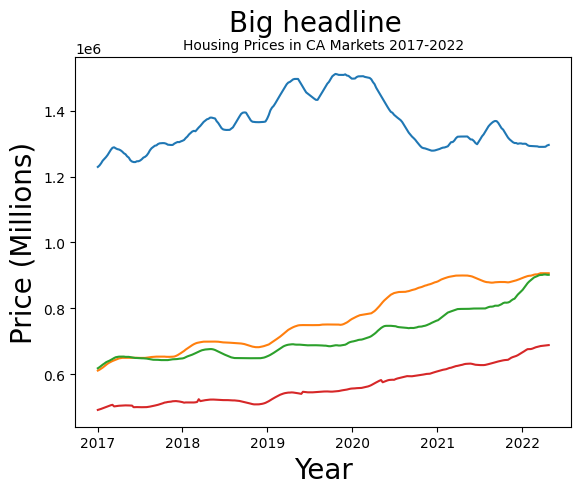

In [25]:
fig, ax = plt.subplots()

ax.plot(ca_housing_markets)

fig.suptitle('Big headline', fontsize=20)
ax.set_title('Housing Prices in CA Markets 2017-2022', fontsize=10)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Price (Millions)', fontsize=20)

Text(0, 0.5, 'Price (Millions)')

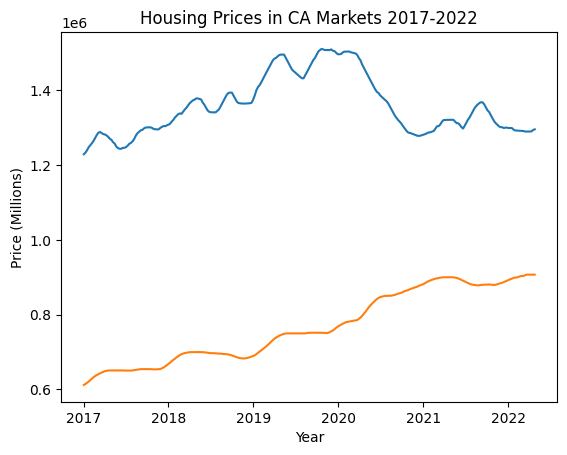

In [26]:
fig, ax = plt.subplots()

ax.plot(ca_housing_markets['San Francisco'])
ax.plot(ca_housing_markets['Los Angeles'])

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')